# Tarefa 1

## Parte I - Métodos de Clusterização


### Dados

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [12]:
cluster_data = pd.read_csv("dados/cluster.dat", header=None, sep="\s",  engine='python', encoding='utf8')

In [17]:
cluster_data.head()

,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05


In [26]:
# Separação de conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
cluster_train, cluster_test = train_test_split(cluster_data, test_size=0.1)

In [33]:
# Normalização
from sklearn.preprocessing import StandardScaler
sc_cluster = StandardScaler()
cluster_train_norm = sc_cluster.fit_transform(cluster_train)
cluster_test_norm = sc_cluster.transform(cluster_test)
cluster_data_norm = sc_cluster.transform(cluster_data)

### K-means

A análise do número de k-cluster está na seção de métricas e avaliação. 

Sendo k = 3 para dados cluster.dat.

In [13]:
# distância euclidiana 
def euclidean_distance(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    diff = v1 - v2
    quad_dist = np.dot(diff, diff)
    return math.sqrt(quad_dist)

In [14]:
# implementação K-means 
class KMeans:
    def __init__(self, k=3, max_iters=100, plot_steps = False,  method_centroids="Forgy"):
        self.k = k
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.legend = ""
        # metodo de inicialização dos centroides
        self.method_centroids = method_centroids
        # Lista de indice de cada centroide
        self.clusters = [[] for _ in range(self.k)]
        # os centroides
        self.centroids = []

    def predict(self, x):
        self.x = x
        self.n_samples, self.n_features = x.shape

        # inicialização dos centroides  Forgy
        if(self.method_centroids == "Forgy"):
            # inicia os centroides na localização de um ponto.
            # Gerar indices
            random_sample_idxs = np.random.choice(
                self.n_samples, self.k, replace=False)
            # Pegar o indice referente ao ponto
            self.centroids = [self.x[idx] for idx in random_sample_idxs]
        # fim da iniciaçização do centroide Forgy

        # inicialização dos centroides Random Partition Method
        if(self.method_centroids == "Partition"):
            # atribuir cada ponto aleatoriamente a um cluster
            indices = np.random.choice(
                range(0, self.k), replace=True, size=x.shape[0])
            # Calcula a media em cada cluster para obter os centros
            mean = []
            for count in range(self.k):
                mean.append(x[indices == count].mean(axis=0))

            self.centroids = np.concatenate(
                [val[None, :] for val in mean], axis=0)

        # fim da iniciaçização do centroide Random Partition Method

        #  Crir cluster - atualizar centroides - Calculando novos centroides - checar se convergiu
        Iterations = 0
        for _ in range(self.max_iters):
            # cria cluster
            self.clusters = self.createClusters(self.centroids)

            if self.plot_steps:
                self.legend = "Centroids iniciais"
                self.plot()
                self.plot_steps = False
                
                

            # atualização centroides- Calcule novos centróides a partir dos clusters
            centroids_old = self.centroids
            self.centroids = self.getCentroids(self.clusters)
            
            Iterations += 1

            # checar se convergiu
            if self.converged(centroids_old, self.centroids):
                self.legend = "Cluster final"
                print("Iterations ", Iterations)
                break

        # retorno das labels do cluster
        return self.clusterLabels(self.clusters)
    def get_centroids(self):
        return self.centroids

    def fit(self, x_test):
        # cria cluster
        self.x = x_test
        self.clusters = self.createClusters(self.centroids)
        self.legend = "Dados de Teste"

        return self.clusterLabels(self.clusters)    

    def clusterLabels(self, clusters):
        # cada amostra receberá o rótulo do cluster ao qual foi atribuída
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def createClusters(self, centroids):
        # atribuir as amostras ao centrroide mais proximo
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.x):
            centroid_idx = self.closestCentroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def closestCentroid(self, sample, centroids):
        # distancia da amostra para cada centroide atual
        distances = [euclidean_distance(sample, point)
                     for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def getCentroids(self, clusters):
        # atribuir valor médio de clusters a centróides
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.x[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def converged(self, centroids_old, centroids):
        # distâncias entre cada centróide antigo e novo, siga todos os centróides
        distances = [euclidean_distance(
            centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def plot(self):
        # plota pontos e os centroides
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.x[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.title(self.legend)
        plt.show()

#### Inicialização dos centroids com o método Random Partition

O método Random Partition atribui os pontos dos dados um k de forma aleatória. Na sequência agrupa os dados de cada k e obtém a média, gerando os centróides iniciais. Geralmente gera centróides próximo da média dos dados.

Na sequência a inicialização dos centróides com método Random Partition, o número de iterações para o k-means convergir e o resultado no gráfico

Dados sem normalizar.



In [15]:
# method_centroids="Partition"
# Limite de iteração =  100
# método de inicialização dos centroids Random Partition
k = KMeans(k=3, max_iters=100, plot_steps = True, method_centroids="Partition")

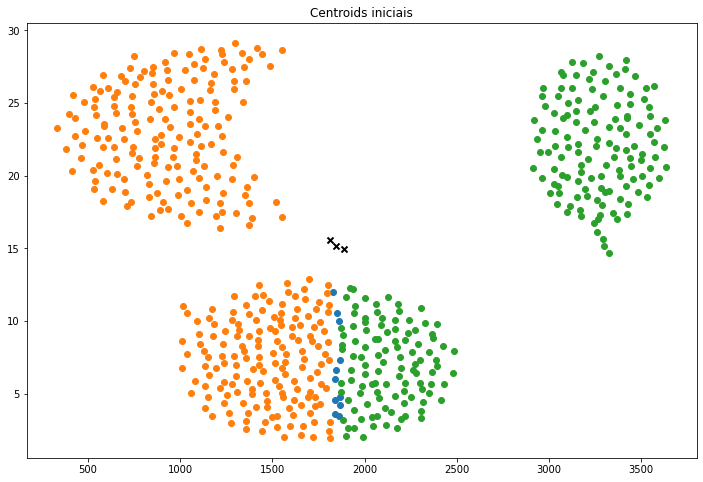

Iterations  4


In [18]:
y_pred = k.predict(cluster_data.values)
# O gráfico a seguir apresenta os centrroids inicializados na primeira iteração sem normalizar dados 
# E os centroids selecionados a cada iteração


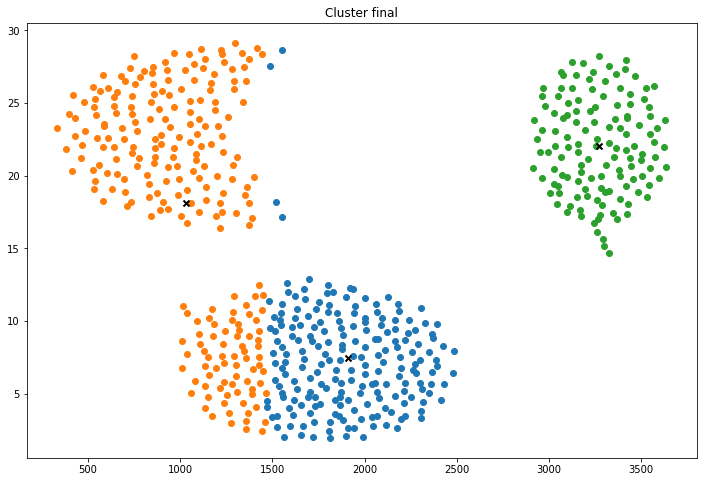

In [19]:
# resultado da clusterização com inicialização dos centroids com método Random Partition sem normalizar dos dados
k.plot()

Percebe-se que, como os dados não estão na mesma escala, o algorítmo prefere agrupar dados que estão próximos segundo o eixo X, ignorando o eixo Y (que está numa escala muito menor).

#### Inicialização dos centroids com o método Forgy
O métodos Forgy escolhe quaisquer k pontos dos dados aleatoriamente como os centróides iniciais. Desta forma os k escolhidos têm probabilidade de estar próximo a um conjunto de dados, mas com a escolha aleatória dos k pode acontecer do k selecionado está isolado ou mais de um k fica muito próximo, dentro de um mesmo cluster.

Na sequência a inicialização dos centróides com método Forgy, o número de iterações para o k-means convergir e o resultado no gráfico.

Dados sem normalizar.

In [21]:
# method_centroids="Forgy"
# Limite de iteração =  100
# método de inicialização dos centroids Forgy
k = KMeans(k=3, max_iters=100, plot_steps = True, method_centroids="Forgy")

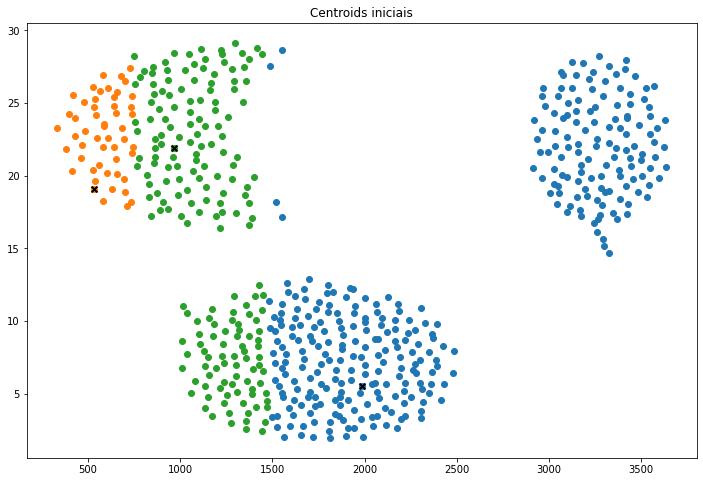

Iterations  12


In [22]:
# O gráfico a seguir apresenta os centrroids inicializados na primeira iteração
# E os centroids selecionados a cada iteração
y_pred = k.predict(cluster_data.values)

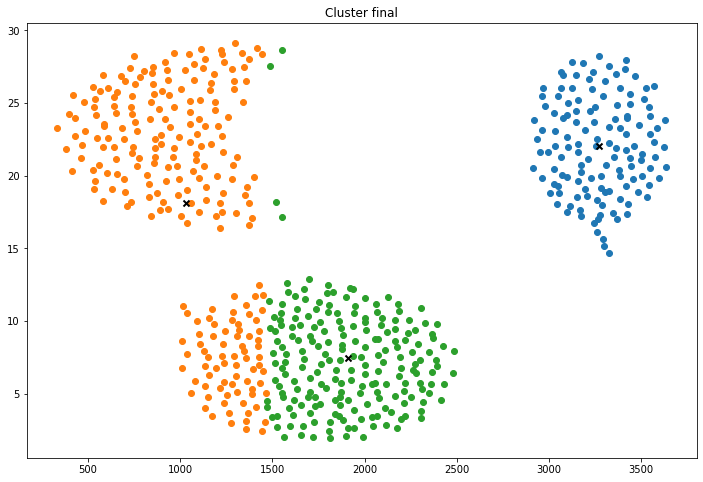

In [23]:
# resultado da clusterização com inicialização dos centroids com método Forgy sem normalizar dos dados
k.plot()

Os gráficos apresentados anteriormente com a inicialização dos centróides dos diferentes métodos e o resultado do agrupamento utilizando o k-means. Pode ser observado que apesar do resultado próximo para os dois métodos, alguns pontos ficaram em grupos diferentes. Esta diferença pode ser atribuída às características dos métodos, no entanto, o principal fator da diferença do agrupamento é a escala dos dados não normalizados, principalmente no eixo X.

#### Treino e teste (90/10) com dados sem normalizar

Na sequência a inicialização dos centróides com método Forgy, o número de iterações para do k-means convergir e os resultado no gráfico.

Dados sem normalizar, porém, separados em 90% de treino para gerar os centróides e 10% para testes.

In [24]:
# inicializando parâmetros k-means
k = KMeans(k=3, max_iters=100, plot_steps = True, method_centroids="Forgy")

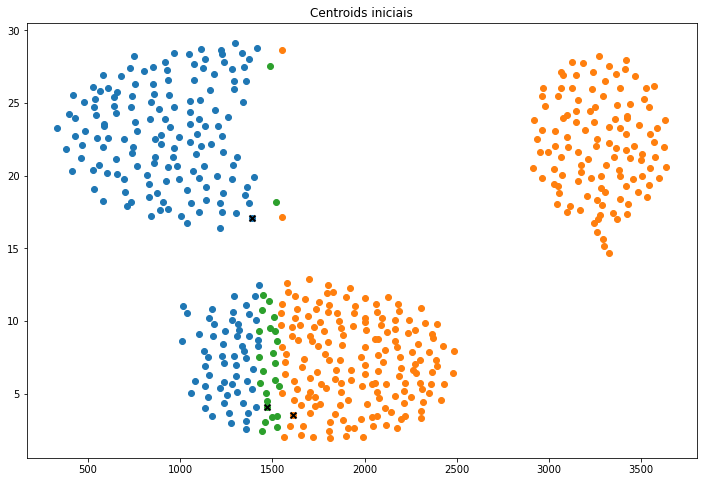

Iterations  11


In [27]:
# Gráfico de inicialização dos centroids no treino
y_pred = k.predict(cluster_train.values)

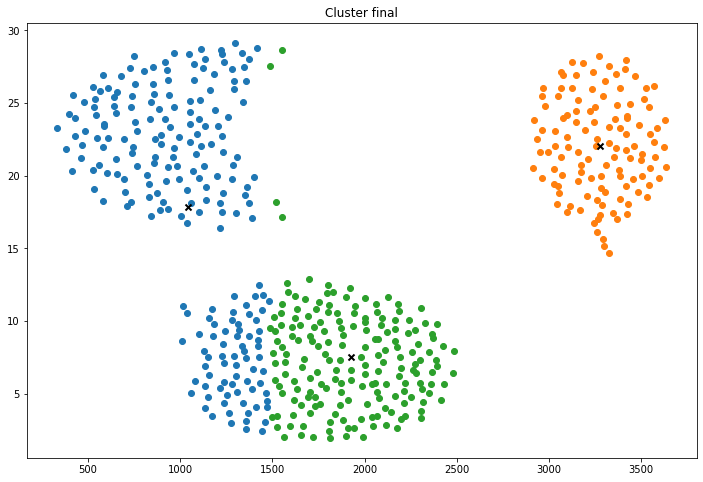

In [28]:
# Resultados clusterização treino sem normalização dos dados
k.plot()

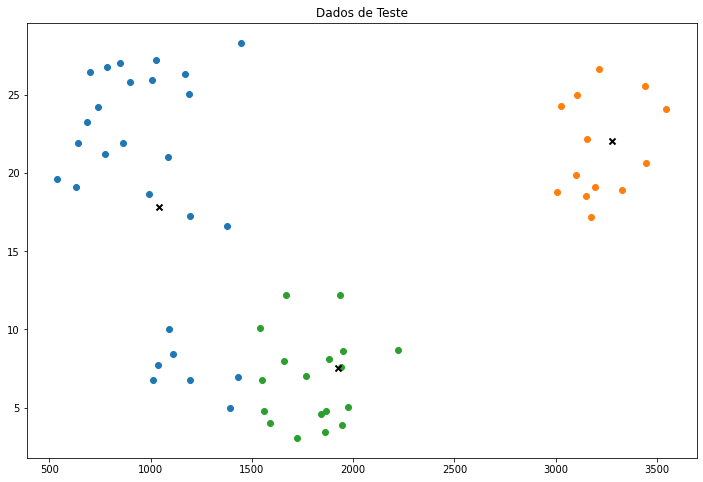

In [30]:
# resultado clusterização com dados de teste sem normalizar
y_tes = k.fit(cluster_test.values)
k.plot()

#### Dados normalizados treino e teste
Na sequência a inicialização dos centróides com método Forgy, o número de iterações para do k-means convergir e os resultado no gráfico.

Dados normalizados, porém, separados em 90% de treino para gerar os centróides e 10% para testes.

In [34]:
# inicializando parâmetros k-means
k = KMeans(k=3, max_iters=100, plot_steps = True, method_centroids="Forgy")

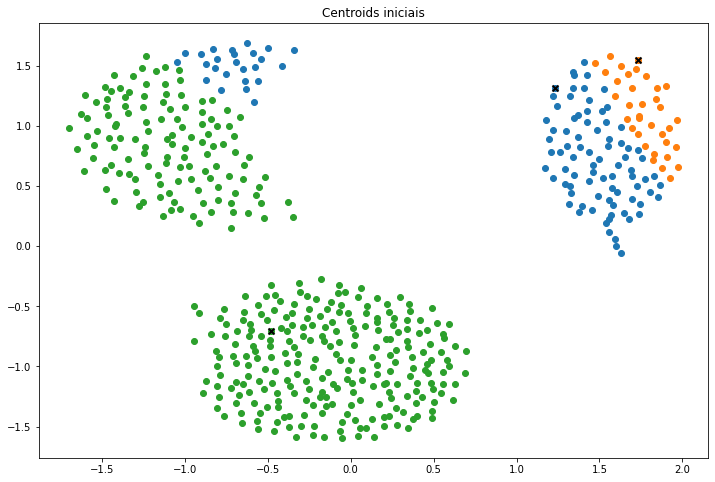

Iterations  7


In [36]:
#Gráfico de inicialização dos centroids no treino com dados normalizados
y_pred = k.predict(cluster_train_norm)

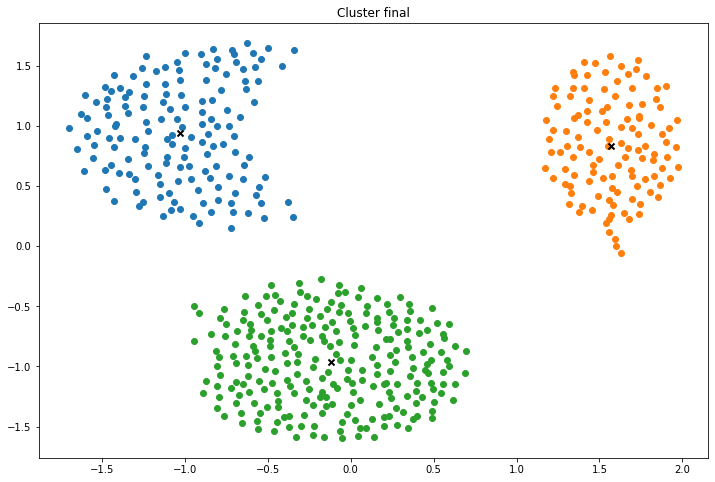

In [37]:
# Resultados clusterização treino com os dados normalizados - method_centroids="Forgy"
k.plot()

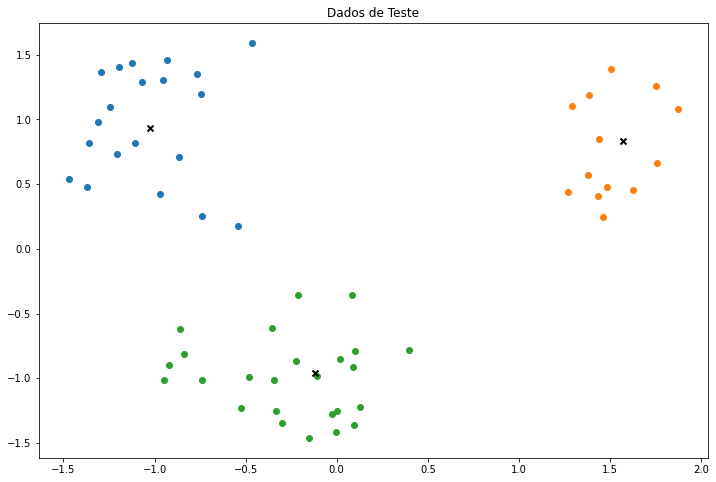

In [38]:
# resultado clusterização com dados de teste normalizados
y_tes = k.fit(cluster_test_norm)
k.plot()

In [39]:
# inicializando parâmetros k-means
k = KMeans(k=3, max_iters=100, plot_steps = True, method_centroids="Partition")

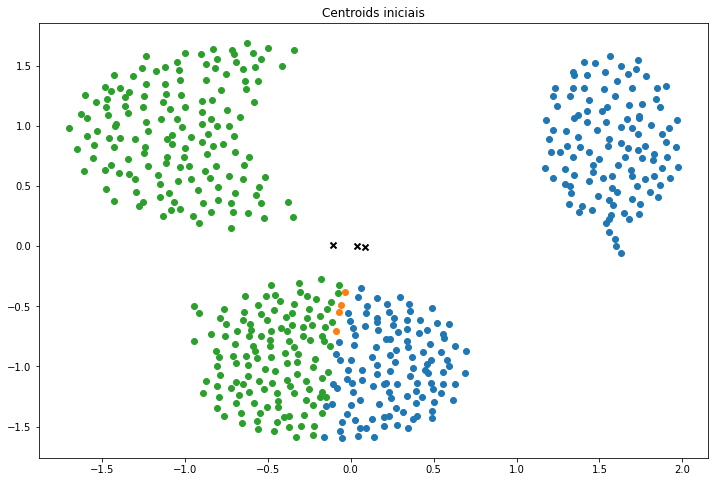

Iterations  4


In [40]:
#Gráfico de inicialização dos centroids no treino com dados normalizados
y_pred = k.predict(cluster_train_norm)

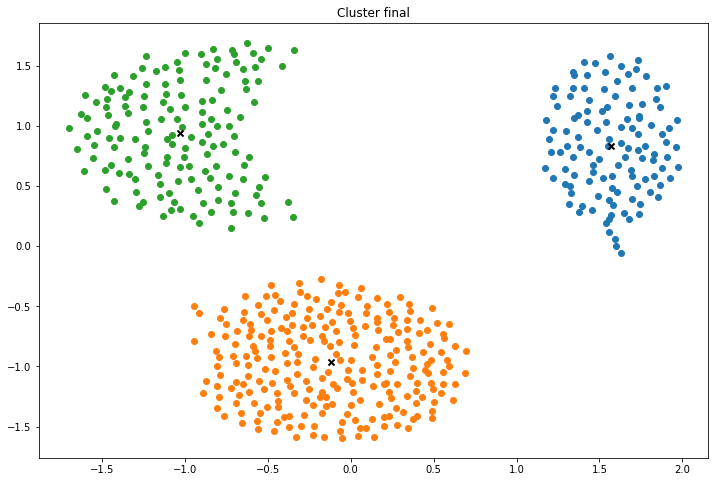

In [41]:
# Resultados clusterização treino com os dados normalizados - method_centroids="Partition"
k.plot()

Com os dados normalizados, independente do método de inicialização dos centróides, o algoritmo k-means convergiu agrupando os dados corretamente, pois como a escala de ambos os eixos são as mesmas o agrupamento não se dá só por um dos eixos (como anteriormente), mas pelos dois eixos.  